In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer
from scipy import stats
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
df =pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Census%20Income/Census%20Income.csv')
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [3]:
df.shape

(32560, 15)

In [4]:
print("Duplicate Records are :", df.duplicated().sum())

Duplicate Records are : 24


In [5]:
df[df.duplicated()]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
4880,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5103,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9170,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11630,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13083,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15058,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17039,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18554,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18697,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21317,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [6]:
# Deleting duplicate records
df =df.drop_duplicates()

In [7]:
df.shape

(32536, 15)

In [8]:
# Again checking duplicate records
print("Duplicate Records are :", df.duplicated().sum())

Duplicate Records are : 0


In [9]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
# Checking datatypes
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [11]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [12]:
# Checking count of each value
for i in df:
    print(df[i].value_counts())

Age
36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64
Workclass
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64
Fnlwgt
123011    13
164190    13
203488    13
121124    12
126675    12
          ..
158040     1
232784     1
325573     1
140176     1
257302     1
Name: count, Length: 21647, dtype: int64
Education
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50


In [13]:
# Deleting null workclass
df[df['Workclass'] =='Private']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


__object variable contains space (before and after).__

In [14]:
# Removing space from object variables
for i in df:
    if df[i].dtypes =='object':
        df[i] =df[i].str.strip()


In [15]:
# Deleting data with ? values
for i in df:
    if df[i].dtypes =='object':
        df.drop(df[df[i] =='?'].index, inplace =True)

In [16]:
# Checking shape of dataset
df.shape

(30138, 15)

In [17]:
# Checking count of each column
for i in df:
    print(df[i].value_counts())

Age
36    852
31    851
33    837
34    836
37    828
     ... 
82      7
83      5
88      3
85      3
86      1
Name: count, Length: 72, dtype: int64
Workclass
Private             22264
Self-emp-not-inc     2498
Local-gov            2067
State-gov            1278
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: count, dtype: int64
Fnlwgt
203488    13
113364    12
148995    12
123011    12
121124    12
          ..
242077     1
327112     1
194475     1
303510     1
201490     1
Name: count, Length: 20262, dtype: int64
Education
HS-grad         9834
Some-college    6669
Bachelors       5041
Masters         1626
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          556
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          287
1st-4th          149
Preschool         44
Name: count, dtype: int64
Education_num
9     9834
10    6669
13    5041
14    1626
11    130

In [18]:
# Seperating Numerical and categorical columns

# Seperating Numerical Columns
num_cols =[]
for i in df.dtypes.index:
    if df[i].dtypes !='object':
        num_cols.append(i)
        
# Seperating Categorical columns
cat_cols =[]
for i in df.dtypes.index:
    if df[i].dtypes =='object':
        cat_cols.append(i)
        
print("Numerical Columns are :", num_cols)
print("Categorical Columns are :", cat_cols)

Numerical Columns are : ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']
Categorical Columns are : ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


# Univariate Analysis

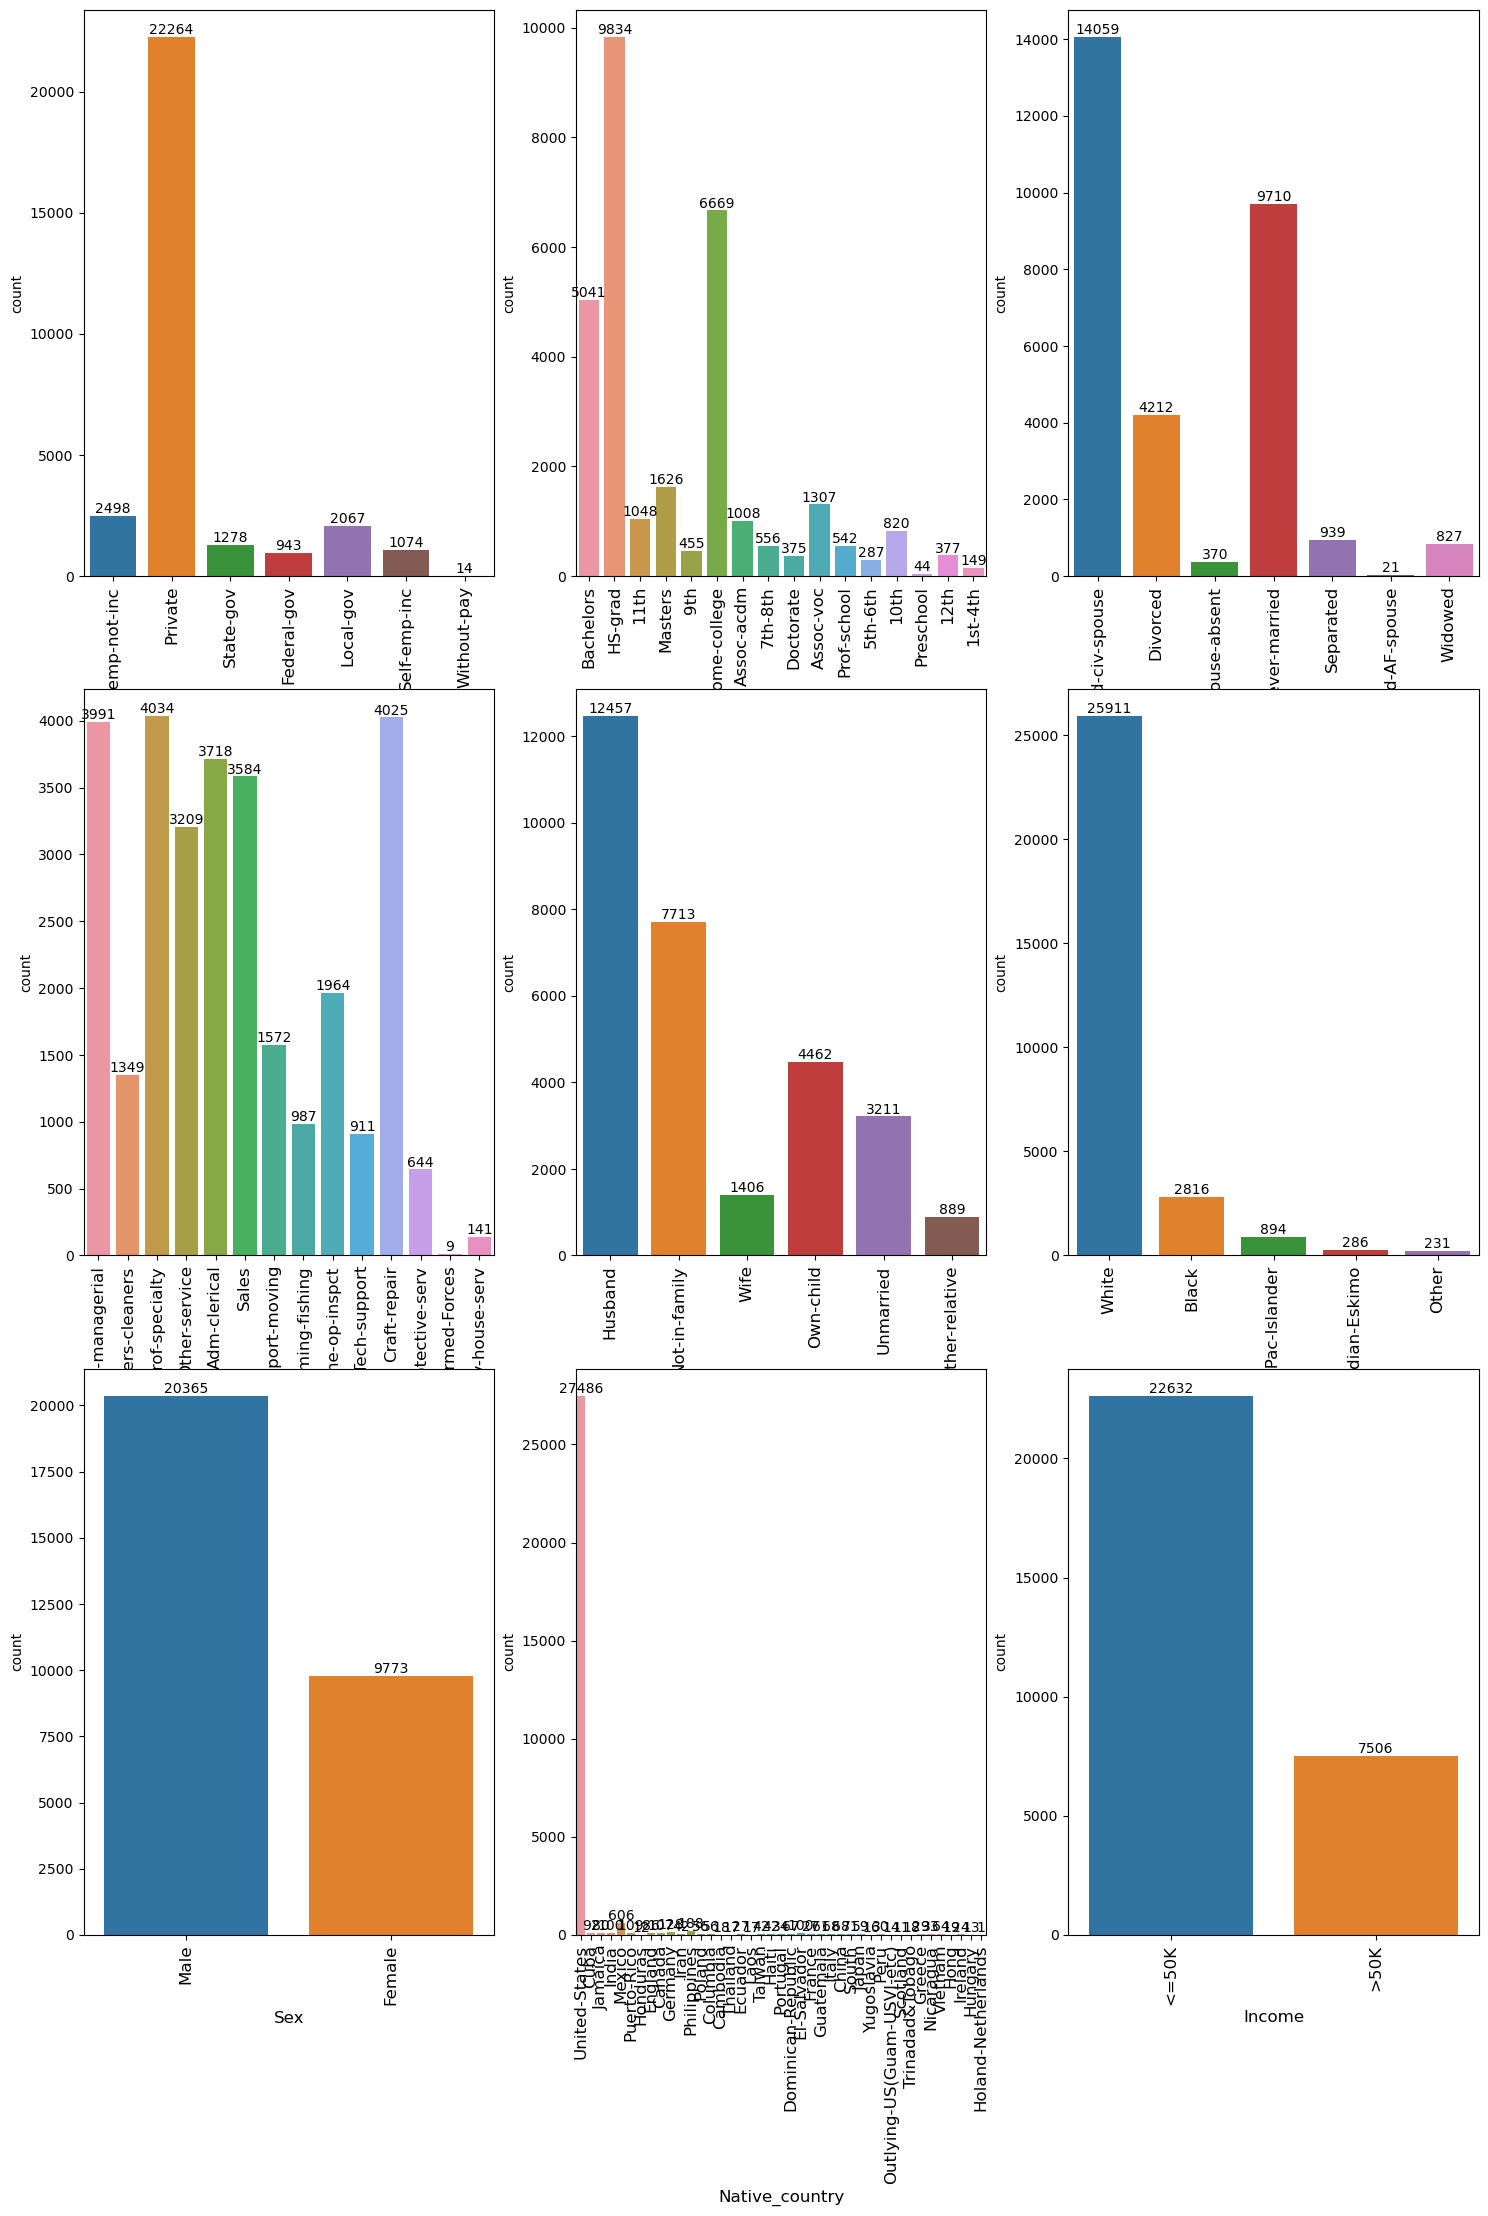

In [19]:
# Plotting countplot for categorical columns
plt.figure(figsize =(18, 25))
plotnumber =1


for i in cat_cols:
    if plotnumber <=9:
        
        plt.subplot(3, 3, plotnumber)
        ax =sns.countplot(x =i, data =df)
        ax.bar_label(ax.containers[0])
        plt.xlabel(i, fontsize =12)
        plt.xticks(rotation =90, fontsize =12)
    plotnumber+=1
plt.show()

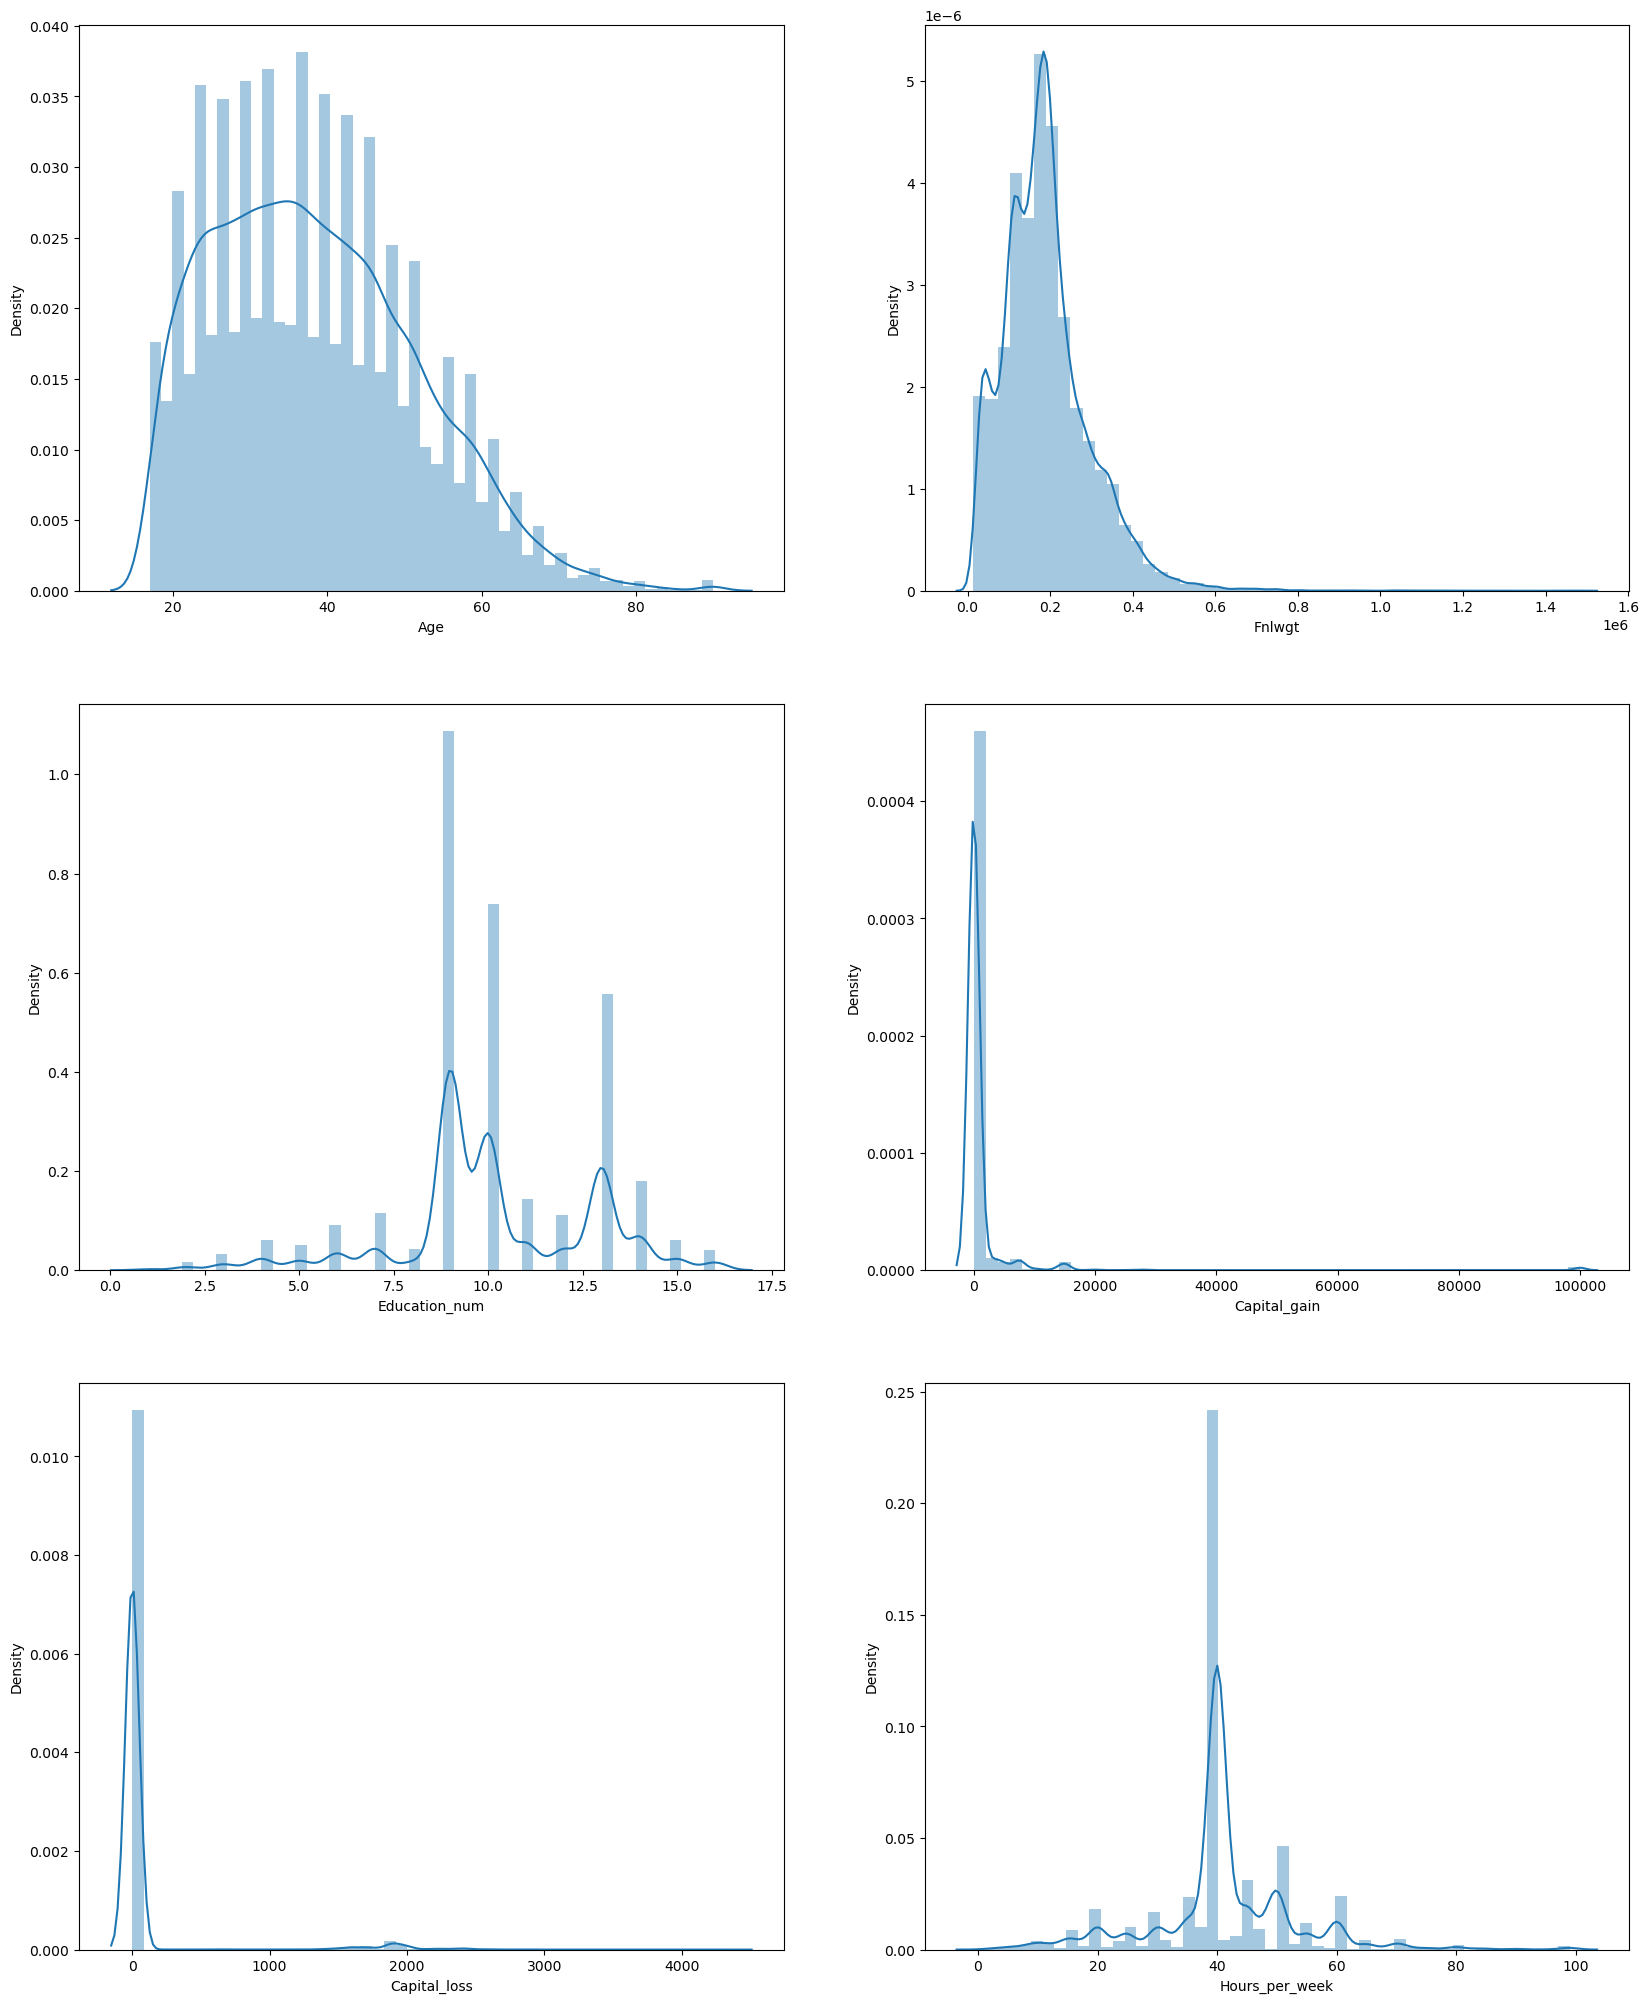

In [20]:
# Checking data distribution for numerical columns
plt.figure(figsize =(20, 25))
plotnumber =1

for i in num_cols:
    if plotnumber <=6:
        plt.subplot(3, 2, plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i)
    plotnumber+=1
plt.show()

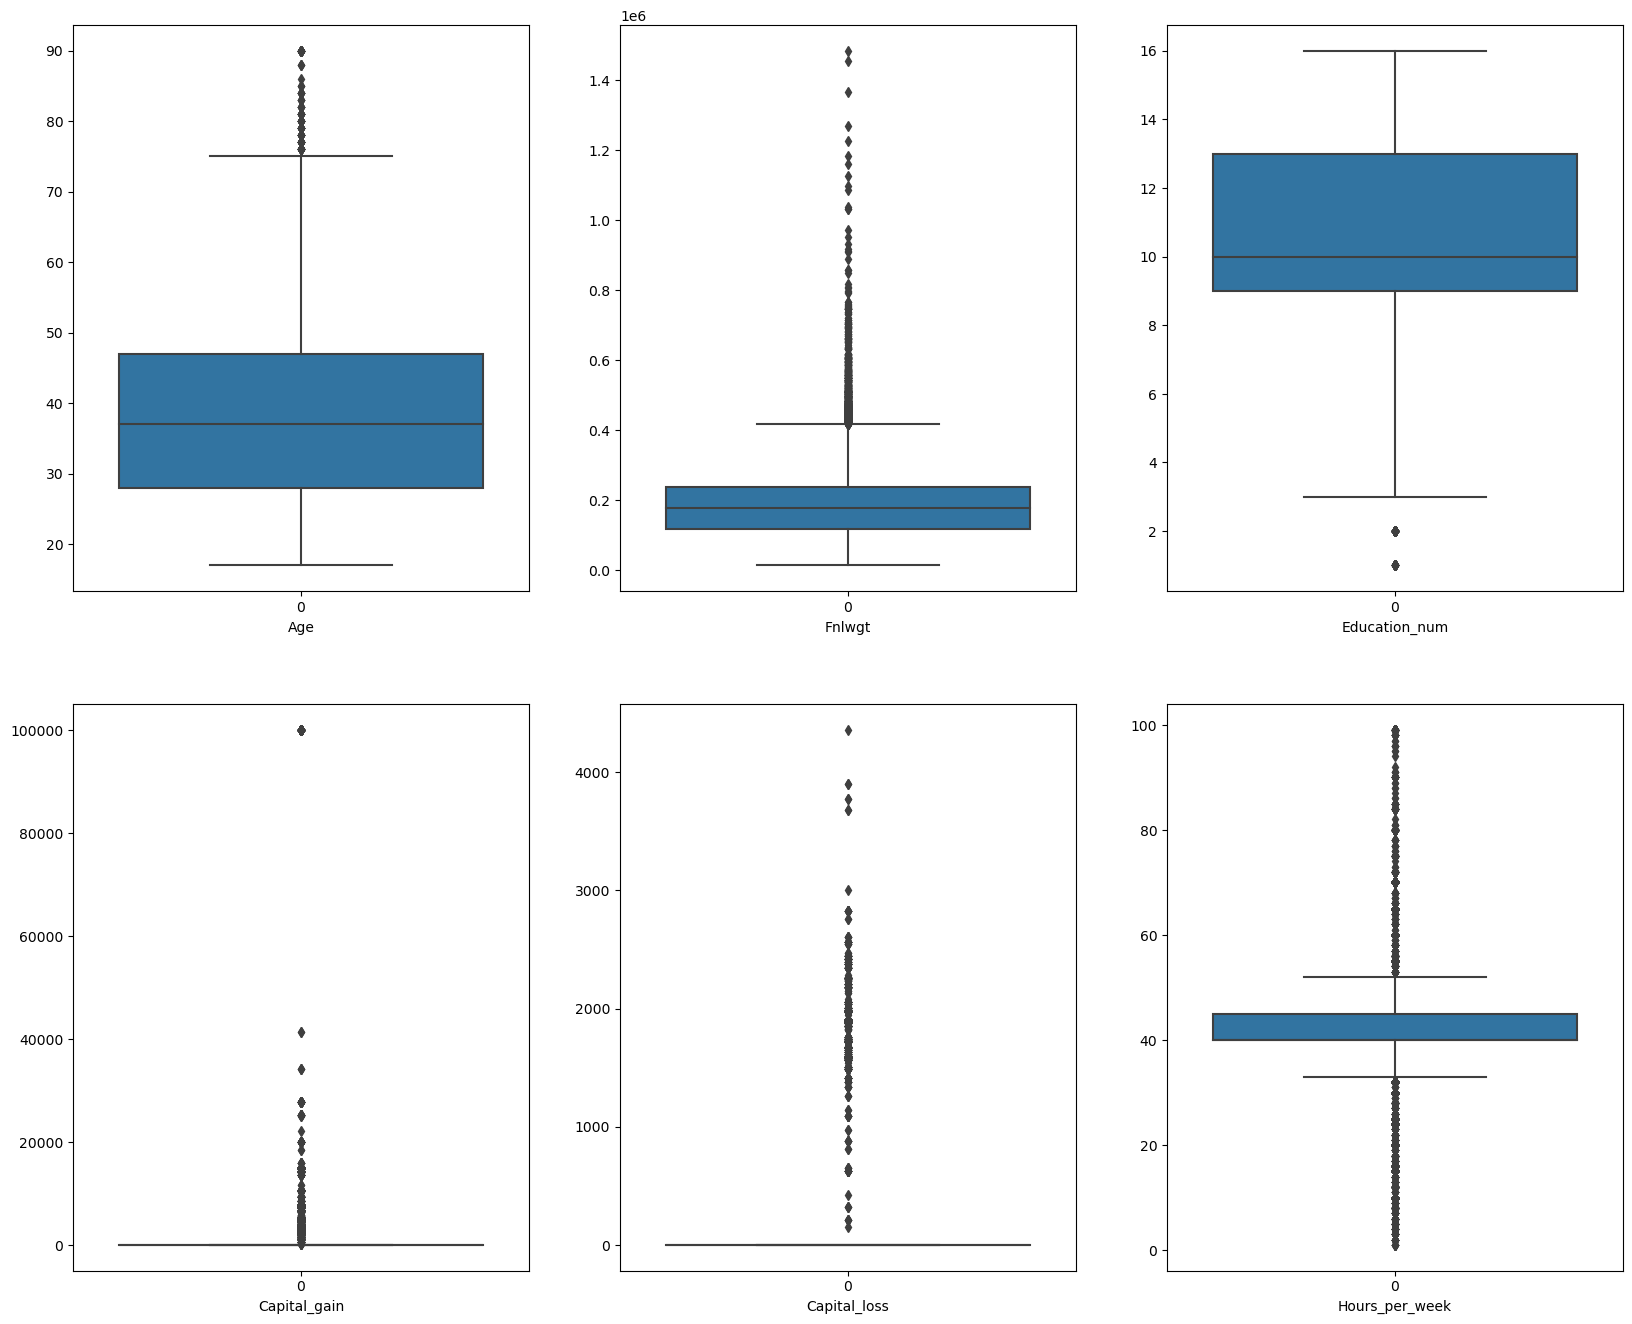

In [21]:
# Checking outliers using boxplot
plt.figure(figsize =(20,25))
plotnumber =1

for i in num_cols:
    if plotnumber <=9:
        plt.subplot(3, 3, plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i)
    plotnumber +=1
plt.show()

In [22]:
# Removing outliers using IQR method

df_iqr =df[num_cols]
Q1 =df_iqr.quantile(0.25)
Q3 =df_iqr.quantile(0.75)

IQR =Q3-Q1

# For Higher side
for i in df_iqr:
    high =Q3[i] +(1.5 * IQR[i])
    high_index =np.where(df_iqr[i] > high)
    df_iqr =df_iqr.drop(df_iqr.index[high_index])
    
# For Lower side
for i in df_iqr:
    low =Q1[i] - (1.5 * IQR[i])
    low_index =np.where(df_iqr[i] < low)
    df_iqr =df_iqr.drop(df_iqr.index[low_index])

In [23]:
# Removing outliers using zscore
df_zscore =df[num_cols]
z =np.abs(zscore(df_zscore))
df_zscore =df_zscore[(z < 3).all(axis=1)]

In [24]:
# Calculating dataloss after removing outliers by IQR and zscore
print("Original shape of dataset :",df.shape[0])
print('\n')
print("Shape of dataset after using IQR method :", df_iqr.shape[0])
print("Data loss after using IQR method :", ((df.shape[0] - df_iqr.shape[0])/df.shape[0])*100)
print('\n')
print("Shape of dataset after using IQR method :", df_zscore.shape[0])
print("Data loss after using IQR method :", ((df.shape[0] - df_zscore.shape[0])/df.shape[0])*100)

Original shape of dataset : 30138


Shape of dataset after using IQR method : 18442
Data loss after using IQR method : 38.80814918043666


Shape of dataset after using IQR method : 27601
Data loss after using IQR method : 8.417944123697657


__We will use zscore to remove outliers as data loss is less as compared to IQR method.__

In [25]:
# Removing outliers using zscore
df =df[(z < 3).all(axis =1)]
df.shape

(27601, 15)

In [26]:
# Checking skewness in the dataset
df[num_cols].skew()

Age                0.448205
Fnlwgt             0.630493
Education_num     -0.162451
Capital_gain       4.855937
Capital_loss      28.995150
Hours_per_week    -0.280220
dtype: float64

In [27]:
# Removing skewness

df['Capital_gain'] =np.log(df['Capital_gain']+1)
df['Capital_loss'] =np.log(df['Capital_loss']+1)

In [30]:
# Again Checking skewness
df[num_cols].skew()

Age                0.448205
Fnlwgt             0.630493
Education_num     -0.162451
Capital_gain       3.095566
Capital_loss      24.671873
Hours_per_week    -0.280220
dtype: float64

__Skewness not reduced much.__

In [31]:
# Converting categorical columns to numerical columns
OE =OrdinalEncoder()
for i in df.dtypes.index:
    if df[i].dtypes =='object':
        df[i] =OE.fit_transform(df[i].values.reshape(-1, 1))
        
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,4.0,83311,8.0,13,2.0,3.0,0.0,4.0,1.0,0.000000,0.0,13,37.0,0.0
1,38,2.0,215646,10.0,9,0.0,5.0,1.0,4.0,1.0,0.000000,0.0,40,37.0,0.0
2,53,2.0,234721,1.0,7,2.0,5.0,0.0,2.0,1.0,0.000000,0.0,40,37.0,0.0
3,28,2.0,338409,8.0,13,2.0,9.0,5.0,2.0,0.0,0.000000,0.0,40,4.0,0.0
4,37,2.0,284582,11.0,14,2.0,3.0,5.0,4.0,0.0,0.000000,0.0,40,37.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,2.0,257302,6.0,12,2.0,12.0,5.0,4.0,0.0,0.000000,0.0,38,37.0,0.0
32556,40,2.0,154374,10.0,9,2.0,6.0,0.0,4.0,1.0,0.000000,0.0,40,37.0,1.0
32557,58,2.0,151910,10.0,9,6.0,0.0,4.0,4.0,0.0,0.000000,0.0,40,37.0,0.0
32558,22,2.0,201490,10.0,9,4.0,0.0,3.0,4.0,1.0,0.000000,0.0,20,37.0,0.0


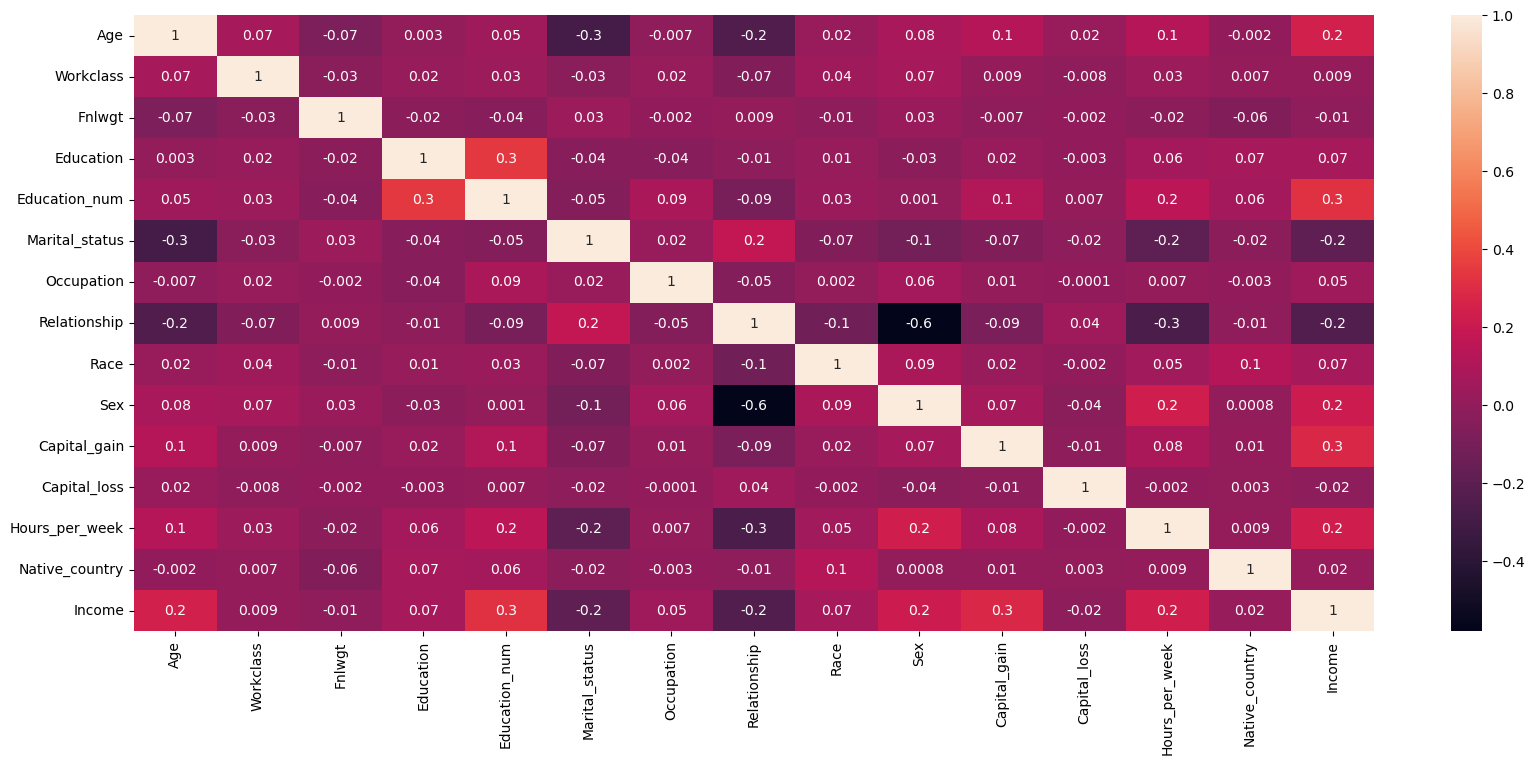

In [32]:
# Checking heatmap
plt.figure(figsize =(20, 8))
sns.heatmap(df.corr(), annot =True, fmt ='.1g')
plt.show()

__No multicollinearity found in the dataset.__

In [33]:
# Seperating features and label
x =df.drop(columns =['Income'])
y =df[['Income']]

In [34]:
# Data Standardization using Standard Scaler
scaler =StandardScaler()
x =pd.DataFrame(scaler.fit_transform(x), columns =x.columns)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.931299,1.905290,-1.078309,-0.355377,1.186465,-0.391010,-0.725266,-0.904557,0.386202,0.70605,-0.297098,-0.040717,-2.545283,0.260457
1,-0.002292,-0.200248,0.321939,0.243631,-0.459558,-1.717249,-0.230608,-0.281807,0.386202,0.70605,-0.297098,-0.040717,-0.035713,0.260457
2,1.164697,-0.200248,0.523774,-2.451905,-1.282569,-0.391010,-0.230608,-0.904557,-2.000358,0.70605,-0.297098,-0.040717,-0.035713,0.260457
3,-0.780284,-0.200248,1.620906,-0.355377,1.186465,-0.391010,0.758708,2.209194,-2.000358,-1.41633,-0.297098,-0.040717,-0.035713,-5.371584
4,-0.080091,-0.200248,1.051357,0.543135,1.597970,-0.391010,-0.725266,2.209194,0.386202,-1.41633,-0.297098,-0.040717,-0.035713,0.260457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27596,-0.858083,-0.200248,0.762705,-0.954385,0.774959,-0.391010,1.500695,2.209194,0.386202,-1.41633,-0.297098,-0.040717,-0.221607,0.260457
27597,0.153307,-0.200248,-0.326385,0.243631,-0.459558,-0.391010,0.016721,-0.904557,0.386202,0.70605,-0.297098,-0.040717,-0.035713,0.260457
27598,1.553693,-0.200248,-0.352457,0.243631,-0.459558,2.261468,-1.467253,1.586444,0.386202,-1.41633,-0.297098,-0.040717,-0.035713,0.260457
27599,-1.247079,-0.200248,0.172153,0.243631,-0.459558,0.935229,-1.467253,0.963694,0.386202,0.70605,-0.297098,-0.040717,-1.894654,0.260457


In [35]:
# Checking VIF score
vif =pd.DataFrame()
vif['VIF Score'] =[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Features'] =x.columns
vif

,VIF Score,Features
0,1.175868,Age
1,1.013040,Workclass
2,1.013074,Fnlwgt
3,1.147672,Education
4,1.197327,Education_num
5,1.138489,Marital_status
6,1.019022,Occupation
7,1.667984,Relationship
8,1.035116,Race
9,1.557907,Sex


__VIF score of all the columns are less than 5, so we will not delete any columns.__

# EDA Completed

## Model Building

### Finding Best Random State

In [37]:
maxrs =0
maxacc =0

for i in range(1, 200):
    x_train, x_test, y_train, y_test =train_test_split(x, y, test_size =0.3, random_state =i)
    RFR =RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred =RFR.predict(x_test)
    acc =accuracy_score(y_test, pred)
    
    if acc > maxacc:
        maxacc =acc
        maxrs =i
        
print("Maximum accuracy is :", maxacc*100, "at random state :", maxrs)

Maximum accuracy is : 85.65390653302741 at random state : 49


In [38]:
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size =0.3, random_state =maxrs)

In [41]:
# Initializing models

RFC =RandomForestClassifier()
ETC =ExtraTreesClassifier()
svc =SVC()
GBC =GradientBoostingClassifier()
ABC =AdaBoostClassifier()
BC =BaggingClassifier()
DTC =DecisionTreeClassifier()
KNN =KNeighborsClassifier()

In [44]:
# Building Models

models ={'RandomForestClassifer': RFC,
        'ExtraTreesClassifier' :ETC,
        'SVC' :svc,
        'GradientBoostingClassifier' :GBC,
        'AdaBoostClassifier' :ABC,
        'BaggingClassifer' :BC,
        'DecisionTreeClassifier' :DTC,
        'KNeighborsClassifier' :KNN}

for name, model in models.items():
    model.fit(x_train, y_train)
    pred =model.predict(x_test)
    acc =accuracy_score(y_test, pred)
    
    print("Model Name :", name)
    print("="*40)
    print("Accuracy of the model is :", acc*100)
    print("Confusion Matrix :\n", confusion_matrix(y_test, pred))
    print("Classification Report :", classification_report(y_test, pred))
    
    print('\n')
    print("="*40)
    print("Cross Validation for the model :", name)
    score =cross_val_score(model, x, y, cv =5)
    print(score)
    print(score.mean())
    print("Difference between Accuracy of the model and cross validation is :", (acc -(score.mean()))*100)
    print('\n')
    print("*"*90)

Model Name : RandomForestClassifer
Accuracy of the model is : 85.55729984301414
Confusion Matrix :
 [[5964  448]
 [ 748 1121]]
Classification Report :               precision    recall  f1-score   support

         0.0       0.89      0.93      0.91      6412
         1.0       0.71      0.60      0.65      1869

    accuracy                           0.86      8281
   macro avg       0.80      0.76      0.78      8281
weighted avg       0.85      0.86      0.85      8281



Cross Validation for the model : RandomForestClassifer
[0.84404999 0.8451087  0.84855072 0.85652174 0.8509058 ]
0.849027389493082
Difference between Accuracy of the model and cross validation is : 0.6545608937059355


******************************************************************************************
Model Name : ExtraTreesClassifier
Accuracy of the model is : 84.53085376162299
Confusion Matrix :
 [[5885  527]
 [ 754 1115]]
Classification Report :               precision    recall  f1-score   support

      

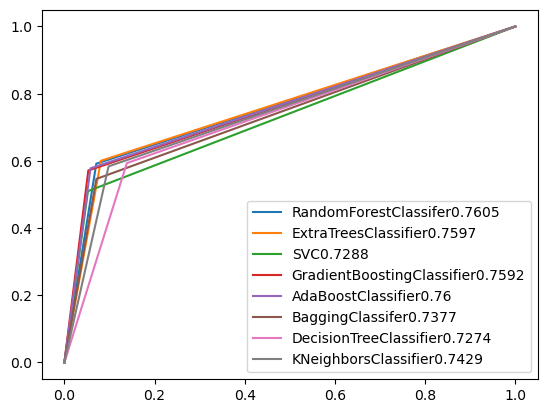

In [66]:
# Plotting ROC AUC score

models ={'RandomForestClassifer': RFC,
        'ExtraTreesClassifier' :ETC,
        'SVC' :svc,
        'GradientBoostingClassifier' :GBC,
        'AdaBoostClassifier' :ABC,
        'BaggingClassifer' :BC,
        'DecisionTreeClassifier' :DTC,
        'KNeighborsClassifier' :KNN}

for name, model in models.items():
    model.fit(x_train, y_train)
    pred =model.predict(x_test)
    acc =accuracy_score(y_test, pred)
    fpr, tpr, _ = metrics.roc_curve(y_test, pred)
    auc = round(metrics.roc_auc_score(y_test, pred), 4)
    plt.plot(fpr,tpr,label=name+str(auc))
plt.legend()

__RandomForestClassifier is our best model with highest roc score of 76.05% and accuracy score of 85.55%.__

# Hyperparameter tunning

In [67]:
parameters ={'n_estimators': [25, 50, 100, 150], 
            'max_features': ['sqrt', 'log2', None], 
            'max_depth': [3, 6, 9], 
            'max_leaf_nodes': [3, 6, 9]
            }

In [69]:
GCV =GridSearchCV(RandomForestClassifier(), parameters, cv =5)
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 50, 100, 150]})

In [70]:
GCV.best_params_

{'max_depth': 9, 'max_features': None, 'max_leaf_nodes': 9, 'n_estimators': 50}

In [77]:
Final_model =RandomForestClassifier(max_depth =9,
                                   max_features =None,
                                   max_leaf_nodes =9,
                                   n_estimators =50)
Final_model.fit(x_train, y_train)
pred =Final_model.predict(x_test)
acc =accuracy_score(y_test, pred)
print("Accuracy after hyperparameter tunning is :", acc*100)

Accuracy after hyperparameter tunning is : 84.62746045163627


__Accuracy does not increase after hyperparameter tunning. We will go with the default features.__

In [78]:
# Final Model (RandomForestClassifier)
Final_model =RandomForestClassifier()
Final_model.fit(x_train, y_train)
pred =Final_model.predict(x_test)
acc =accuracy_score(y_test, pred)
print("Accuracy after hyperparameter tunning is :", acc*100)

Accuracy after hyperparameter tunning is : 85.60560318802078


In [79]:
# Saving the model
pickle.dump(Final_model, open('Census_Income.pkl', 'wb'))

In [81]:
# Loading Model
loaded_model =pickle.load(open('Census_Income.pkl', 'rb'))
loaded_model.fit(x_train, y_train)
pred =loaded_model.predict(x_test)
acc =accuracy_score(y_test, pred)
print("Accuracy of the Model is :", acc*100)

Accuracy of the Model is : 85.49692066175582


In [84]:
# Comparing actual vs predicted
act =np.array(y_test)
df1 =pd.DataFrame()
df1['Predicted'] =pred
df1['Actual'] =act
df1

,Predicted,Actual
0,0.0,0.0
1,0.0,1.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
8276,0.0,0.0
8277,1.0,1.0
8278,1.0,1.0
8279,1.0,1.0
